In [14]:
from typing import Dict, TypedDict, List
from langgraph.graph import StateGraph

In [3]:
class AgentState(TypedDict):
    message: str

def greeting_node(state: AgentState) -> AgentState:
    """Simple node that adds greeting message to the state"""

    state['message']= "Hey " + state['message'] + ", how is you day going?"

    return state

In [4]:
graph= StateGraph(AgentState)

graph.add_node("greeter", greeting_node)

graph.set_entry_point("greeter")
graph.set_finish_point("greeter")

app= graph.compile()

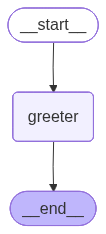

In [7]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
app.invoke({"message": "Pratyush"})

{'message': 'Hey Pratyush, how is you day going?'}

In [9]:
result= app.invoke({"message": "Pkala7968"})
print(result['message'])

Hey Pkala7968, how is you day going?


In [10]:
class AgentState(TypedDict):
    name: str
    op: str

def compliment_node(state: AgentState) -> AgentState:
    """Node that adds a compliment based on the name"""

    state['op']= f"{state['name']}, you are doing an amazing job!"

    return state

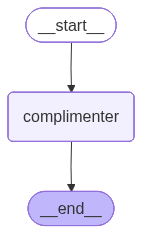

In [12]:
graph2= StateGraph(AgentState)

graph2.add_node("complimenter", compliment_node)

graph2.set_entry_point("complimenter")
graph2.set_finish_point("complimenter")

app2= graph2.compile()

display(Image(app2.get_graph().draw_mermaid_png()))

In [13]:
result2= app2.invoke({"name": "Pratyush"})

result2['op']

'Pratyush, you are doing an amazing job!'

In [15]:
class AgentState(TypedDict):
    values: List[int]
    name: str
    result: str

def process_vals(state: AgentState)-> AgentState:
    """Handles multiple inputs"""
    state['result']= f"Hi {state['name']}! The sum of your values is {sum(state['values'])}."
    
    return state

In [16]:
graph3= StateGraph(AgentState)

graph3.add_node("processor", process_vals)
graph3.set_entry_point("processor")
graph3.set_finish_point("processor")
app3= graph3.compile()

res3= app3.invoke({"name": "John Cena", "values": [1,2,3,4,5]})
print(res3['result'])

Hi John Cena! The sum of your values is 15.


In [17]:
print(res3)

{'values': [1, 2, 3, 4, 5], 'name': 'John Cena', 'result': 'Hi John Cena! The sum of your values is 15.'}


In [18]:
class AgentState(TypedDict):
    values: List[int]
    name: str
    operation: str
    result: str

def do_this(state: AgentState)-> AgentState:
    """Handles multiple inputs"""
    if(state['operation']=='+'):
        state['result']= f"Hi {state['name']}! The sum of your values is {sum(state['values'])}."
    elif(state['operation']=='-'):
        res= state['values'][0]
        for v in state['values'][1:]:
            res-=v
        state['result']= f"Hi {state['name']}! The result of subtracting your values is {res}."
    elif(state['operation']=='*'):
        prod=1
        for v in state['values']:
            prod*=v
        state['result']= f"Hi {state['name']}! The product of your values is {prod}."
    else:
        state['result']= f"Hi, {state['name']}, unfortunately idk how to do that."
        
    return state

In [20]:
graph4= StateGraph(AgentState)

graph4.add_node("processor", do_this)
graph4.set_entry_point("processor")
graph4.set_finish_point("processor")
app4= graph4.compile()

res4= app4.invoke({"name": "John Cena", "values": [1,2,3,4,5], "operation": "*"})
print(res4['result'])

Hi John Cena! The product of your values is 120.


In [21]:
class AgentState(TypedDict):
    name: str
    age: int
    result: str

def first_node(state: AgentState)-> AgentState:
    """first node"""
    state['result']=f"Hi {state['name']}!"

    return state

def second_node(state: AgentState)-> AgentState:
    """second node"""
    state['result']+= f" You are {state['age']} years old."

    return state

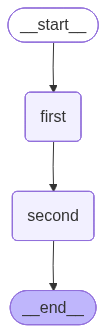

In [22]:
graph= StateGraph(AgentState)
graph.add_node("first", first_node)
graph.add_node("second", second_node)

graph.set_entry_point("first")
graph.add_edge("first","second")
graph.set_finish_point("second")

app= graph.compile()

display(Image(app.get_graph().draw_mermaid_png()))

In [23]:
res= app.invoke({"name":"pkala","age":21})
print(res)

{'name': 'pkala', 'age': 21, 'result': 'Hi pkala! You are 21 years old.'}


In [25]:
class AgentState(TypedDict):
    name: str
    age: int
    skills: List[str]
    result: str

def first_node(state: AgentState)-> AgentState:
    """first node"""
    state['result']=f"Hi {state['name']}!"

    return state

def second_node(state: AgentState)-> AgentState:
    """second node"""
    state['result']+= f" You are {state['age']} years old."

    return state

def third_node(state: AgentState)-> AgentState:
    """third node"""
    state['result']+=f" You are skilled in {', '.join(state['skills'][0:-1])} and {state['skills'][-1]}."

    return state

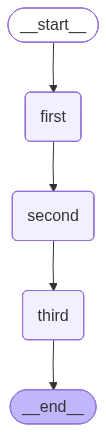

In [26]:
graph= StateGraph(AgentState)
graph.add_node("first", first_node)
graph.add_node("second", second_node)
graph.add_node("third", third_node)

graph.set_entry_point("first")
graph.add_edge("first","second")
graph.add_edge("second","third")
graph.set_finish_point("third")

app= graph.compile()

display(Image(app.get_graph().draw_mermaid_png()))

In [27]:
res= app.invoke({"name":"pkala","age":21,"skills":['Python','Data Science','Machine Learning','Agentic AI']})
print(res)

{'name': 'pkala', 'age': 21, 'skills': ['Python', 'Data Science', 'Machine Learning', 'Agentic AI'], 'result': 'Hi pkala! You are 21 years old. You are skilled in Python, Data Science, Machine Learning and Agentic AI.'}


In [28]:
res['result']

'Hi pkala! You are 21 years old. You are skilled in Python, Data Science, Machine Learning and Agentic AI.'

In [30]:
from langgraph.graph import StateGraph, START, END

class AgentState(TypedDict):
    num1: int
    op: str
    num2: int
    res: int

def adder(state: AgentState)-> AgentState:
    """add 2 nums"""
    state['res']= state['num1'] + state['num2']
    return state

def subtractor(state: AgentState)-> AgentState:
    """subtract 2 nums"""
    state['res']= state['num1'] - state['num2']
    return state

def decide_next(state: AgentState)-> str:
    """decides next node of graph"""
    if state['op']=='+':
        return 'adder'
    elif state['op']=='-':
        return 'subtractor'
    else:
        return END

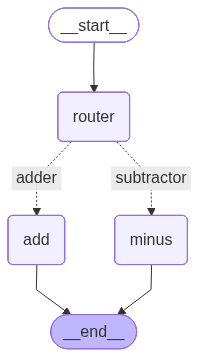

In [32]:
graph= StateGraph(AgentState)
graph.add_node("add", adder)
graph.add_node("minus", subtractor)
graph.add_node("router", lambda state:state)

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router", 
    decide_next,
    {
        'adder': 'add',
        'subtractor': 'minus',
    }
    
)

graph.add_edge("add", END)
graph.add_edge("minus", END)

app= graph.compile()

display(Image(app.get_graph().draw_mermaid_png()))

In [34]:
init_state_1=AgentState(num1=10, op='-', num2=5)
print(app.invoke(init_state_1))

{'num1': 10, 'op': '-', 'num2': 5, 'res': 5}


In [39]:
import random

class AgentState(TypedDict):
    name: str
    number: List[int]
    counter: int

def greeting(state: AgentState)-> AgentState:
    """greeting"""
    state['name']= f"Hi {state['name']}!"
    state['counter']=0
    return state

def random_node(state: AgentState)-> AgentState:
    """random"""
    state['number'].append(random.randint(1,100))
    state['counter']+=1
    return state

def should_cont(state: AgentState)-> str:
    """decides if to continue"""
    if state['counter']<5:
        print("entering loop ",state['counter'])
        return "loop"
    else:
        return "exit"

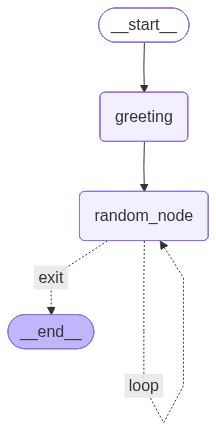

In [40]:
graph= StateGraph(AgentState)
graph.add_node("greeting", greeting)
graph.add_node("random_node", random_node)
graph.add_edge("greeting","random_node")

graph.add_conditional_edges(
    "random_node", 
    should_cont,
    {
        'loop': 'random_node',
        'exit': END
    }
)
graph.set_entry_point("greeting")

app= graph.compile()

display(Image(app.get_graph().draw_mermaid_png()))

In [45]:
app.invoke({"name":"pkala","number":[],'counter':-1})

entering loop  1
entering loop  2
entering loop  3
entering loop  4


{'name': 'Hi pkala!', 'number': [56, 93, 77, 34, 45], 'counter': 5}